**Part 1**

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Define data filepath
pathname = 'data/lab2/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

**Part a)** Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)

In [3]:
# Filter fires larger than 50 acres
df_50 = df[df['FIRE_SIZE'] > 50]

# Filter fires that were caused by human causes
df_50_human = df_50[df_50['NWCG_CAUSE'] == 'Human']

In [4]:
# Group fires into counties and sum fire sizes
counties_grouped = df_50_human['FIRE_SIZE'].groupby(df_50_human['FIPS_NAME']).sum()

In [5]:
# Print county and size of fire
print(counties_grouped.idxmax(), counties_grouped.max())

Wasco County 244034.65000000002


**Part b)** Which **month** had the most **natural** caused wildfires **>100 acres**?

In [6]:
# Filter fires larger than 100 acres
df_100 = df[df['FIRE_SIZE'] > 100]

# Filter fires that were caused by natural causes
df_100_natural = df_100[df_100['NWCG_CAUSE'] == 'Natural']

In [7]:
datetime = pd.to_datetime(df_100_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')

In [8]:
df_100_natural['datetime'] = datetime

C:\Users\theoh\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
# Find number of fires in each month (i.e. number of rows in each month)
month_fire_count = df_100_natural.iloc[:,0].groupby(df_100_natural['datetime'].dt.month).count()

In [11]:
# Print month and total number of fires
print(month_fire_count.idxmax(), month_fire_count.max())

8 549


**Part c)** How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?

In [12]:
# Filter fires larger than 200 acres
df_200 = df[df['FIRE_SIZE'] > 200]

# Filter fires that were caused by natural causes
df_200_undetermined = df_100[df_100['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [13]:
# Print number of fires that had an undetermined cause (number of rows)
print(len(df_200_undetermined.index))

15


**Part d)** What is the name, date, and county of the **largest sized fire**?

In [14]:
max_size = df['FIRE_SIZE'].max()

In [15]:
# Print name
print(df.loc[df['FIRE_SIZE'] == max_size, 'FIRE_NAME'].item())

LONG DRAW


In [16]:
# Print date
print(df.loc[df['FIRE_SIZE'] == max_size, 'DISCOVERY_'].item())

2012/07/08 00:00:00.000


In [17]:
# Print county
print(df.loc[df['FIRE_SIZE'] == max_size, 'FIPS_NAME'].item())

Malheur County


**Part e)** How many wildfires in **Lane County** were **>50 acres**?

In [18]:
# Filter fires larger than 50 acres
df_50 = df[df['FIRE_SIZE'] > 50]

df_50_lane = df_50[df_50['FIPS_NAME'] == 'Lane County']

In [19]:
# Print number of fires (number of rows)
print(len(df_50_lane.index))

33


***

**Part 2**

In [20]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

In [21]:
# Download total populattion data at county level for North Carolina
nc = products.ACS(2019).from_state('North Carolina', level='county',
                                        variables=['B01003_001E'])

C:\Users\theoh\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\theoh\anaconda3\envs\lab2\lib\site-packages\pandas\core\dtypes\cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\theoh\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.gith

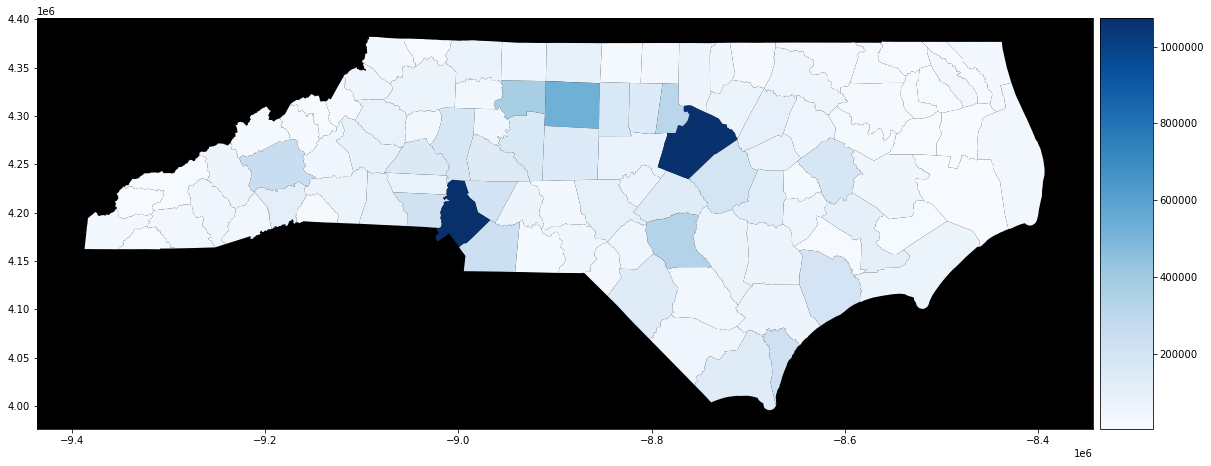

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(20,20))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

nc.plot('B01003_001E', ax=ax, cmap='Blues', legend=True, cax=cax)

# Change background color to black
ax.set_facecolor('k')

# Disable scientific notation for legend values
plt.ticklabel_format(style='plain')